### 영상 프레임 분할

In [4]:
import cv2


filepath = '../data/daehwan_test.mov'
video = cv2.VideoCapture(filepath) #수정

if not video.isOpened():
    print("Video is unavailable :", filepath)
    exit(0)
    
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
fps = video.get(cv2.CAP_PROP_FPS)
count = 0
    
while(video.isOpened()):
    ret, image = video.read()
    if(int(video.get(1)) % int(fps) == 0):
        cv2.imwrite(filepath[:-4] + "/" + "daehwan.%d.jpg" % count, image)
        print('Saved frame number :', str(video.get(1)))
        count += 1
    if int(video.get(1)) == length:
        video.release()
        break

Saved frame number : 29.0
Saved frame number : 58.0
Saved frame number : 87.0
Saved frame number : 116.0
Saved frame number : 145.0
Saved frame number : 174.0
Saved frame number : 203.0
Saved frame number : 232.0
Saved frame number : 261.0
Saved frame number : 290.0
Saved frame number : 319.0
Saved frame number : 348.0
Saved frame number : 377.0
Saved frame number : 406.0
Saved frame number : 435.0
Saved frame number : 464.0
Saved frame number : 493.0
Saved frame number : 522.0
Saved frame number : 551.0
Saved frame number : 580.0
Saved frame number : 609.0
Saved frame number : 638.0
Saved frame number : 667.0
Saved frame number : 696.0
Saved frame number : 725.0
Saved frame number : 754.0
Saved frame number : 783.0
Saved frame number : 812.0
Saved frame number : 841.0
Saved frame number : 870.0
Saved frame number : 899.0
Saved frame number : 928.0
Saved frame number : 957.0
Saved frame number : 986.0
Saved frame number : 1015.0
Saved frame number : 1044.0
Saved frame number : 1073.0


In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

2024-03-20 16:59:55.767162: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-20 16:59:55.797095: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 16:59:55.797126: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 16:59:55.797815: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-20 16:59:55.802420: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import pandas as pd
import numpy as np
import os

from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

레이블링

In [3]:
import os

labels = []
file_id = []

path = "../data/gaeun_test/"
full_names = sorted(os.listdir(path))

for each in full_names:
    labels.append(each.split('.')[0])
    file_id.append(each.split('.')[1])
    
unique_id = [f"{label}_{id}" for label, id in zip(labels, file_id)]

In [7]:
print(len(labels))

34


In [9]:
print(len(full_names))

34


샘플 보기

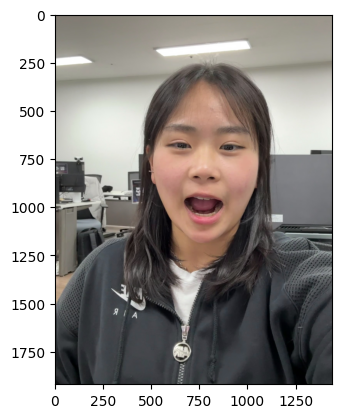

In [45]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image = image.resize(image, (64, 64, 3))
plt.imshow(image)
plt.show()

In [49]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np
import cv2

images = []

for file in tqdm(full_names):
    image = mpimg.imread(path + file)
    images.append(image)
    
images = np.array(images)

  0%|          | 0/34 [00:00<?, ?it/s]

In [50]:
images.shape, labels[:3]

((34, 1920, 1440, 3), ['gaeun', 'gaeun', 'gaeun'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[59:62], encoder.classes_